In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('spam.csv', encoding = 'latin-1')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4933,ham,Hey do you want anything to buy:),NaN,NaN,NaN
5002,spam,CDs 4u: Congratulations ur awarded å£500 of CD...,NaN,NaN,NaN
171,ham,"Hmmm.. Thk sure got time to hop ard... Ya, can...",NaN,NaN,NaN
2663,spam,8007 FREE for 1st week! No1 Nokia tone 4 ur mo...,NaN,NaN,NaN
2791,ham,"Û_ we r stayin here an extra week, back next ...",Well there's still a bit left if you guys want...,NaN,NaN


In [ ]:
df.shape

(5572, 5)

#1. Data Cleaning (The removal of last three columns)


In [ ]:
df.info() #used to get the information of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#Since, In last three columns there are more number of null values therefore, we will remove them
df.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'] ,inplace = True ) #inplace = true (Because this is a permanent operation)

In [ ]:
df.shape

(5572, 2)

In [ ]:
df.sample(5)

,v1,v2
4291,ham,G.W.R
2279,ham,"Sorry, I'll call later in meeting"
1177,ham,Just nw i came to hme da..
3154,ham,Ok...
3155,ham,Long time. You remember me today.


In [ ]:
#Renaming the columns
df.rename(columns={'v1' : 'target', 'v2' : 'text'} , inplace = True )

In [ ]:
df.sample(5)

,target,text
2668,spam,Wanna get laid 2nite? Want real Dogging locati...
2843,ham,Today iZ Yellow rose day. If u love my frndshi...
4346,spam,U 447801259231 have a secret admirer who is lo...
512,ham,Lol ok your forgiven :)
3348,ham,Oh is it! Which brand?


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target']) #made it like a 0 or 1 (i.e., classifier based prediction either 0 or 1)

In [ ]:
df.sample(5)

,target,text
101,0,I'm still looking for a car to buy. And have n...
4748,0,Thanx u darlin!im cool thanx. A few bday drink...
1750,0,Got it..mail panren paru..
2841,0,aathi..where are you dear..
2960,0,I'm doing da intro covers energy trends n pros...


In [ ]:
#Remove the null values from our dataframe
df.isnull().sum()

,0
target,0
text,0


In [ ]:
#We'll be checking for the duplicate values
df.duplicated().sum()

403

In [ ]:
#We'll be removing the duplicated values
df = df.drop_duplicates(keep='first')

In [ ]:
df.shape

(5169, 2)

# 2. EDA(Exploratory Data Analysis) To find the patterns inside the DataSet

In [ ]:
#To check the number of spam and ham in our dataset
df['target'].value_counts()

,count
target,
0,4516
1,653


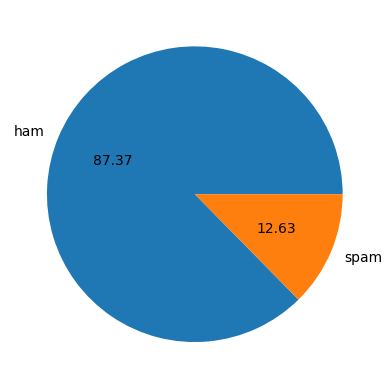

In [ ]:
#Now we will be demonstrating our data of 0's and 1's in piechart format
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts() , labels = ['ham' , 'spam'],autopct = '%0.2f')
plt.show() #This will remove the unwanted data that is shown while getting the output

In [ ]:
#Data is Imbalanced (Analysis we got from our matplotlib library)

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#This will get the number of characters in the text column (will be applied to each and every row present there)
df['num_characters'] = df['text'].apply(len) #apply is used to apply this function to a particular axis

In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#Now we will be counting the number of a words in a particular axis using nltk
df['num_words'] = df['text'].apply( lambda x : len(nltk.word_tokenize(x)) ) #Here we first converted the sentence into words and stored them in the form of a list and then counted the size of the list( len(nltk.word_tokenize(x)) is used for this purpose)

In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sentences'] = df['text'].apply( lambda x: len(nltk.sent_tokenize(x)) )

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
#Here we wanted to describe three things and not other columns therefore, we choose all three of them in the form of a list
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df['target'].describe()

,target
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
 #For describing the ham messages
 df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#For describing the spam messages
df[df['target'] == 1][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

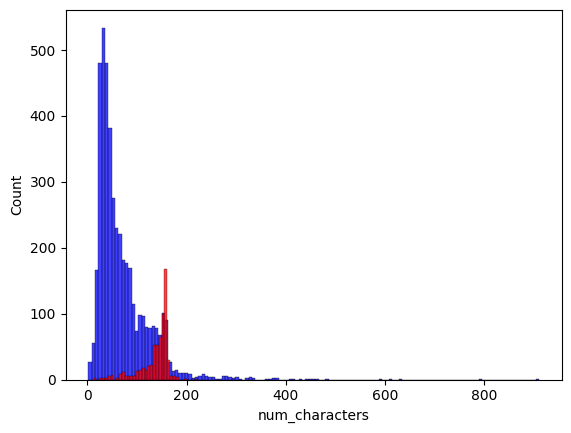

In [ ]:
#We will be creating a histogram for ham and spam
sns.histplot(df[df['target'] == 0]['num_characters'],color = 'blue')
sns.histplot(df[df['target'] == 1]['num_characters'] , color = 'red')

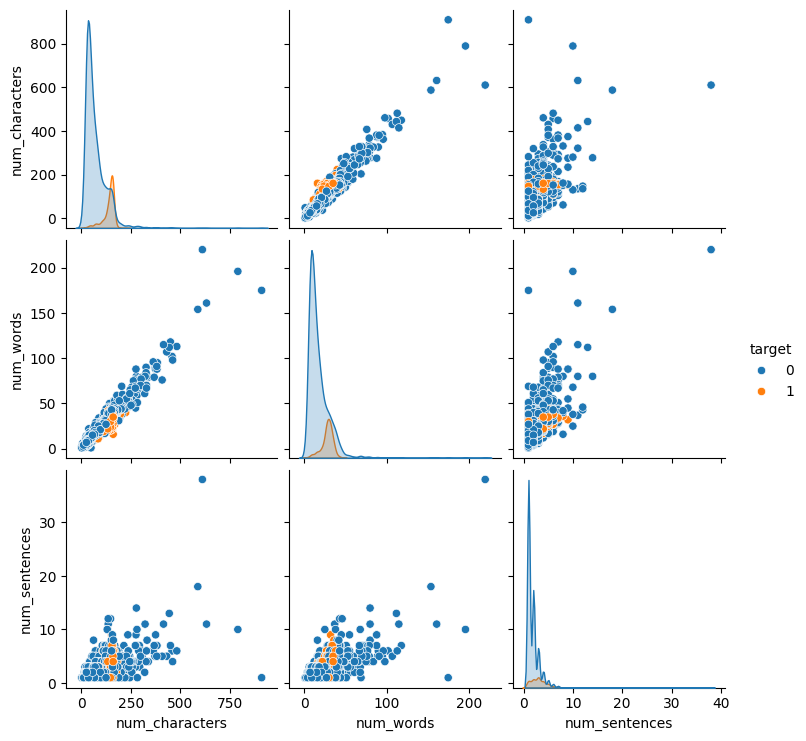

In [ ]:
sns.pairplot(df , hue = 'target')

# 3. Data Preprocessing


Functions to be performed in Data Preprocessing


1. LowerCase
2. Tokenization
3. Removing Special Characters
4. Removing stop words and punctuations
5. Stemming (Conversion of same type of words into one)





In [ ]:
!pip install nltk # install the nltk library
import nltk # import the nltk library
import string #From here we will get all the punctuation marks
from nltk.stem.porter import PorterStemmer #This thing is used for stemming purpose
nltk.download('stopwords') # download the stopwords dataset
from nltk.corpus import stopwords #These are the words which just supports the formation of the sentences such as 'i', 'we'
ps = PorterStemmer()

#We'll be creating a single function for the above mentioned operations
def transform_text(text):
  text = text.lower() #Lowercase opertion done
  text = nltk.word_tokenize(text) #Word tokenization (will create a list of all the words inside the sentence)
  #Finding the special characters inside the list we created just now using nltk

  y = []
  for i in text:
    if i.isalnum():
        y.append(i) # We are creating a list which will be storing all the alpha numeric values and will not append the special characters into it
  text = y[:] # We are cloning the list , if we will write text = y , then this will create a reference and hence changes done to one list will reflect those changes in another list
  y.clear()

  #Now we will be removing all the punctuation and the stopwords
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation: #This line will remove all the stopwords and all the punctuation marks
      y.append(i)
  text = y[:]
  y.clear()

  #Now we will be stemming the words
  for i in text:
    y.append(ps.stem(i))
  text = y[:]
  y.clear()
  return " ".join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
transform_text("Hi , My name is Ayush Badoni. I love playing basketball and running")

'hi name ayush badoni love play basketbal run'

In [ ]:
 transform_text(df['text'][0]) #Here we have fetched the 0 index value in the text column of our dataframe df

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
#Now we will be displaying the most used words
from wordcloud import WordCloud
wc = WordCloud( width = 500 , height = 500 , min_font_size = 10 , background_color = 'white')

In [ ]:
ham_wc = wc.generate( df[df['target'] == 0]['transformed_text'].str.cat(sep =" ") ) #Here we are creaating a variable which will be generating most frequent letters used

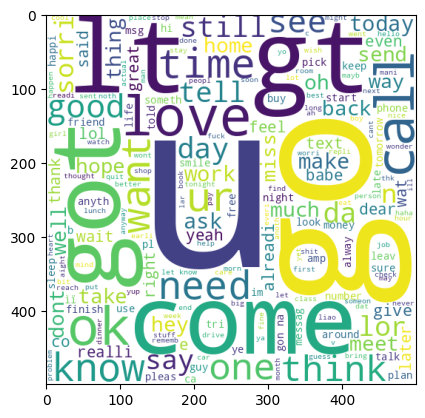

In [ ]:
plt.imshow(ham_wc) #This will get us all the most used letters inside the transformed text which is having the target = 0

In [ ]:
spam_wc = wc.generate( df[df['target'] == 1 ]['transformed_text'].str.cat(sep=" "))

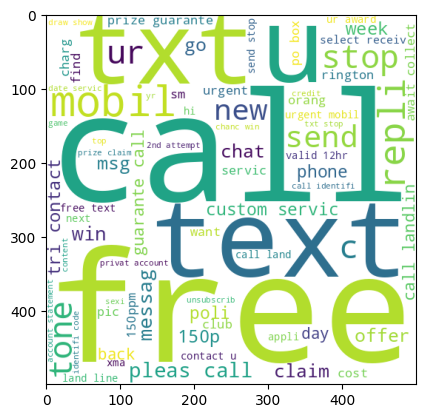

In [ ]:
plt.imshow(spam_wc)

In [ ]:
#Now we will be getting all the spam words
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].to_list():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
#Now we will be counting , just like mapping in C++
from collections import Counter
Counter(spam_corpus).most_common(30) #This will count the number of occurence of each word and most common will ensure that the first x number of details are to be displayed

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

#4. Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [ ]:
X.shape

(5169, 6708)

In [ ]:
y = df['target'].values

In [ ]:
 from sklearn.model_selection import train_test_split
 X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 2)

In [ ]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [ ]:
gnb.fit( X_train , y_train )
y_pred1 = gnb.predict(X_test)

In [ ]:
print(accuracy_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))
print(precision_score(y_test , y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [ ]:
mnb.fit( X_train , y_train )
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test , y_pred2))
print(confusion_matrix(y_test , y_pred2))
print(precision_score(y_test , y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [ ]:
bnb.fit( X_train , y_train )
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test , y_pred3))
print(confusion_matrix(y_test , y_pred3))
print(precision_score(y_test , y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
# We have choose tfidf and mnb